In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

import chugunov_indicator as chug

In [2]:
data = chug.DetonationData("./data/subch_plt08582/")

yt : [INFO     ] 2024-09-18 13:56:27,601 Parameters: current_time              = 0.40003216130915
yt : [INFO     ] 2024-09-18 13:56:27,602 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2024-09-18 13:56:27,604 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-18 13:56:27,605 Parameters: domain_right_edge         = [5.12000000e+09 1.02400000e+10 6.28318531e+00]


In [3]:
T, D = data.D_T_meshgrid()

In [4]:
i = 500
kwargs = {
    "abar": data.data["abar"][i],
    "zbar": data.data["zbar"][i],
    "z2bar": data.data["z2bar"][i],
    **data.data["ScreenFactors"][1]
}
kwargs

{'abar': 4.028776983649797,
 'zbar': 2.0143884920095214,
 'z2bar': 4.129496456710949,
 'z1': 2,
 'a1': 4,
 'z2': 6,
 'a2': 12}

In [5]:
F = chug.chugunov_2009(T, D, **kwargs)

In [6]:
T_border, D_border = chug.fitting.border_from_grid(T, D, F, percent=0.99875)

In [7]:
(c, k), pcov = chug.parameters_from_border(T_border, D_border, return_pcov=True)

In [16]:
display( (c, k), np.sqrt(pcov) )

(22.5287353657504, 2.9816288026195332)

array([[0.38843644, 0.12751616],
       [0.12751616, 0.04186238]])

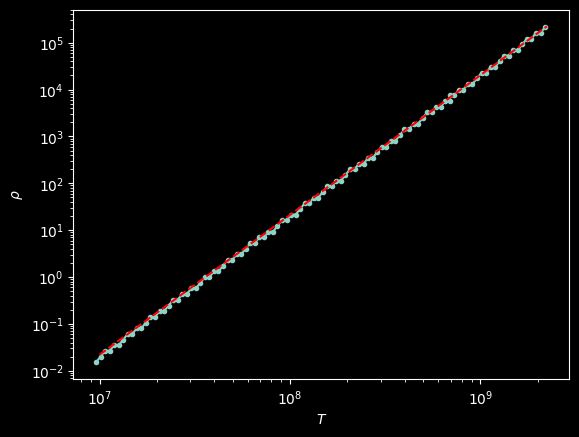

In [9]:
fig1, ax1 = plt.subplots()

chug.D_T_setup(ax1)

ax1.plot(T_border, D_border, marker=".")
T_ = np.logspace(7, 9.35)
D_ = chug.border_func(T_, c, k)

line, = ax1.plot(T_, D_, color="red", linestyle="--")

TODO: create plots of the different variables with c and k using `linspace`

all on one subplot? grid notation

In [10]:
print(data.data["abar"].min(), data.data["abar"].max())
print(data.data["zbar"].min(), data.data["zbar"].max())
print(data.data["z2bar"].min(), data.data["z2bar"].max())

4.028776676342192 52.43965444432472
2.0143883383557393 26.223830930940498
4.1294958073363555 713.3104742534674


In [11]:
variance = data.data["z2bar"] - data.data["zbar"]**2
variance.min(), variance.max()

(0.07173538122272038, 163.844288919927)

In [17]:
key_line = "abar"

new_data = {**kwargs}
new_data[key_line] = np.linspace(1, 60, 600)

In [18]:
params = chug.parameters_from_vars(T=T, D=D, **new_data)

In [19]:
C = params[:, 0]
K = params[:, 1]

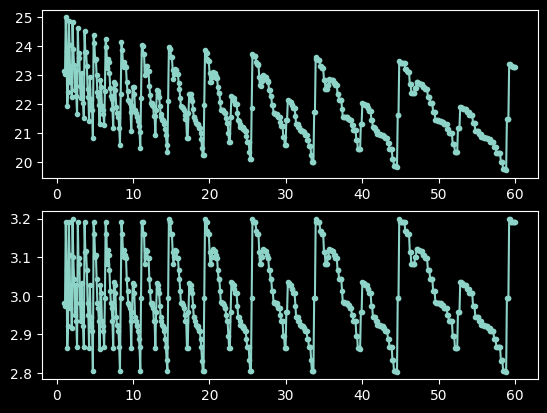

In [20]:
fig2, ax2 = plt.subplots(2, 1)

ax2[0].plot(new_data[key_line], C, marker=".")
ax2[1].plot(new_data[key_line], K, marker=".")